In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels.discrete.discrete_model import NegativeBinomial

In [2]:
import NegativeBinomial as NB

load data

In [3]:
df = pd.read_csv('size_condition_data.csv', index_col=0)

In [4]:
X0 = df[['cells_per_sample']]
X1 = df[['cells_per_sample', 'age']]
Y = df['cnt']

X0 = NB.add_const(X0)
X1 = NB.add_const(X1)

/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1
/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1


fit w

In [5]:
NB_0 = NB.NB_Reg(X0, Y)
NB_1 = NB.NB_Reg(X1, Y)
NB_0.fit_w()
NB_1.fit_w()

/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:34: RuntimeWarning: overflow encountered in exp
  mu = np.exp(np.dot(self.X, params))
/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:37: RuntimeWarning: invalid value encountered in true_divide
  ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))
/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:34: RuntimeWarning: overflow encountered in exp
  mu = np.exp(np.dot(self.X, params))
/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:37: RuntimeWarning: invalid value encountered in true_divide
  ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))


In [6]:
print(NB_0.params, NB_0.phi)
print(NB_1.params, NB_1.phi)

[9.30042234e-04 1.32392900e+00] 1
[ 8.90160585e-04 -6.36970965e-01  1.60420697e+00] 1


In [7]:
print(NB_0.optimize_record_w)
print(NB_1.optimize_record_w)

      fun: 46.89699218925257
 hess_inv: array([[ 6.52811232e-07, -1.76494723e-07],
       [-1.76494723e-07,  7.86557794e-05]])
      jac: array([6.39438629e-04, 9.53674316e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 69
      nit: 9
     njev: 23
   status: 2
  success: False
        x: array([9.30042234e-04, 1.32392900e+00])
      fun: 46.25654183007505
 hess_inv: array([[ 4.14526897e-07,  2.81373541e-05, -3.53104108e-04],
       [ 2.81373541e-05,  3.15519718e-01, -1.62795560e-01],
       [-3.53104108e-04, -1.62795560e-01,  4.37120370e-01]])
      jac: array([ 2.31761932e-02, -9.53674316e-07, -5.00679016e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 227
      nit: 9
     njev: 54
   status: 2
  success: False
        x: array([ 8.90160585e-04, -6.36970965e-01,  1.60420697e+00])


fit phi

In [8]:
NB_0.fit_phi()
NB_1.fit_phi()

In [9]:
print(NB_0.optimize_record_phi)
print(NB_1.optimize_record_phi)

      fun: 41.364383639482654
 hess_inv: array([[24.94702974]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([7.25528281])
      fun: 38.23688973722855
 hess_inv: array([[347.36186487]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([17.80862167])


statsmodels

In [10]:
NB_S0 = NegativeBinomial(Y, X0).fit(method='newton')
NB_S1 = NegativeBinomial(Y, X1).fit(method='newton')

Optimization terminated successfully.
         Current function value: 2.757449
         Iterations 5
Optimization terminated successfully.
         Current function value: 2.548987
         Iterations 4


In [11]:
print(NB_S0.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:                    cnt   No. Observations:                   15
Model:               NegativeBinomial   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                 0.08289
Time:                        14:27:12   Log-Likelihood:                -41.362
converged:                       True   LL-Null:                       -45.100
Covariance Type:            nonrobust   LLR p-value:                  0.006249
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
cells_per_sample     0.0010      0.000      3.090      0.002       0.000       0.002
const                1.3042      0.301      4.335      0.000       0.715       1.894
alpha                0.1375 

In [12]:
print(NB_S1.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:                    cnt   No. Observations:                   15
Model:               NegativeBinomial   Df Residuals:                       12
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.1522
Time:                        14:27:12   Log-Likelihood:                -38.235
converged:                       True   LL-Null:                       -45.100
Covariance Type:            nonrobust   LLR p-value:                  0.001043
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
cells_per_sample     0.0009      0.000      3.502      0.000       0.000       0.001
age                 -0.6256      0.232     -2.700      0.007      -1.080      -0.171
const                1.5897 

In [13]:
print(NB_0.params, NB_0.phi)
print(NB_1.params, NB_1.phi)

[9.30042234e-04 1.32392900e+00] [7.25528281]
[ 8.90160585e-04 -6.36970965e-01  1.60420697e+00] [17.80862167]


In [14]:
print(NB_0.optimize_record_phi)
print(NB_1.optimize_record_phi)

      fun: 41.364383639482654
 hess_inv: array([[24.94702974]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([7.25528281])
      fun: 38.23688973722855
 hess_inv: array([[347.36186487]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([17.80862167])


fit w and phi together

In [15]:
NB_0.__init__(X0, Y)
NB_1.__init__(X1, Y)

In [16]:
NB_0.fit()
NB_1.fit()


/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:26: RuntimeWarning: overflow encountered in exp
  mu = np.exp(np.dot(self.X, params_phi[:-1]))
/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:29: RuntimeWarning: invalid value encountered in true_divide
  ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))


In [17]:
print(NB_0.optimize_record)
print(NB_1.optimize_record)

   direc: array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21861762e+05, 4.34974519e+04, 2.82506481e+08]])
     fun: -0.0
 message: 'Optimization terminated successfully.'
    nfev: 128
     nit: 2
  status: 0
 success: True
       x: array([2.04831933e+09, 7.31129031e+08, 4.74852389e+12])
   direc: array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21394098e+05, 4.34974519e+04, 4.34974519e+04, 2.82506481e+08]])
     fun: -0.0
 message: 'Optimization terminated successfully.'
    nfev: 152
     nit: 2
  status: 0
 success: True
       x: array([2.04045857e+09, 7.31129031e+08, 7.31129031e+08, 4.74852389e+12])


fit w and phi separately

In [18]:
NB_0.__init__(X0, Y)
NB_1.__init__(X1, Y)

NB_0.fit_w()
NB_1.fit_w()
NB_0.fit_phi()
NB_1.fit_phi()

print(NB_0.optimize_record_phi)
print(NB_1.optimize_record_phi)

/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:34: RuntimeWarning: overflow encountered in exp
  mu = np.exp(np.dot(self.X, params))
/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:37: RuntimeWarning: invalid value encountered in true_divide
  ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))
/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:34: RuntimeWarning: overflow encountered in exp
  mu = np.exp(np.dot(self.X, params))
/Users/qiaojiamu/Library/Mobile Documents/com~apple~CloudDocs/Bioinformtics/GLM_Hackathon/ACE2/ACE2_LRT/NegativeBinomial.py:37: RuntimeWarning: invalid value encountered in true_divide
  ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))


      fun: 41.364383639482654
 hess_inv: array([[24.94702974]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([7.25528281])
      fun: 38.23688973722855
 hess_inv: array([[347.36186487]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([17.80862167])


predict

In [19]:
df['NB_0'] = NB_0.predict(X0)
df['NB_1'] = NB_1.predict(X1)
df['NB_S0'] = NB_S0.predict()
df['NB_S1'] = NB_S1.predict()

In [20]:
df

,SRR,age,cnt,cells_per_sample,cnt_per_cell,NB_0,NB_1,NB_S0,NB_S1
0,SRR8426358,1,2,398,0.005025,5.441669,3.749115,5.383417,3.754749
1,SRR8426359,1,7,397,0.017632,5.436610,3.745780,5.378292,3.751365
2,SRR8426360,0,3,695,0.004317,7.172888,9.233781,7.143506,9.174285
3,SRR8426361,0,9,295,0.030508,4.944577,6.467595,4.880365,6.396242
4,SRR8426362,1,12,1449,0.008282,14.462516,9.555135,14.648794,9.686609
5,SRR8426363,1,2,277,0.007220,4.862490,3.366287,4.797408,3.366628
6,SRR8426364,1,4,1034,0.003868,9.831511,6.603911,9.865930,6.662698
7,SRR8426365,0,13,1377,0.009441,13.525775,16.944751,13.677894,16.968987
8,SRR8426366,0,26,1245,0.020884,11.963156,15.066246,12.061956,15.064763
9,SRR8426367,0,9,724,0.012431,7.368982,9.475251,7.343570,9.417360


plot

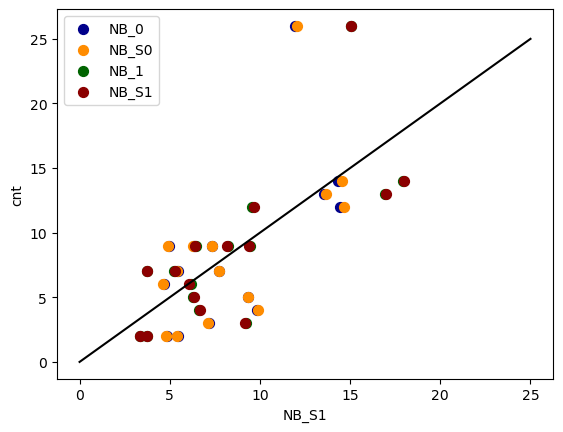

In [21]:
ax1 = df.plot.scatter(x='NB_0', y='cnt', c='DarkBlue', label='NB_0', s=50)
ax1 = df.plot.scatter(x='NB_S0', y='cnt', c='DarkOrange', ax=ax1, label='NB_S0', s=50)
ax1 = df.plot.scatter(x='NB_1', y='cnt', c='DarkGreen', ax=ax1, label='NB_1', s=50)
ax1 = df.plot.scatter(x='NB_S1', y='cnt', c='DarkRed', ax=ax1, label='NB_S1', s=50)

reference = np.linspace(0, 25, 25)
ax1.plot(reference, reference, c='black')
plt.show()

### likelihood ratio test

In [22]:
lr_statistic = 2 * ((-1) * NB_1.optimize_record_phi.fun - (-1) * NB_0.optimize_record_phi.fun)
lr_statistic_S = 2 * (NB_S1.llf - NB_S0.llf)

In [23]:
p_val = sp.stats.chi2.sf(lr_statistic, 1)
p_val_S = sp.stats.chi2.sf(lr_statistic_S, 1)
print(lr_statistic, p_val)
print(lr_statistic_S, p_val_S)

6.254987804508204 0.01238441009087306
6.253873009346108 0.012392206218859425
